# Predict female behav vars from surrogate single-neuron activity

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import sys

import warnings
warnings.filterwarnings("ignore")

from disp import set_plot, plot_b
from record_0_main import smlt_ma

cc = np.concatenate

FPS = 30.03
DT = 1/FPS

STRAINS = ['NM91', 'ZH23']
STRAIN_KEY = '_'.join(STRAINS).lower()

FSTRAIN = 'data/simple/strains.csv'
MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

In [2]:
df_behav = pd.read_csv('data/simple/c_song_f_behav.csv')
df_behav

ID  FRAME           T  Q  S  P  F    FFV     FFA    FLS    FRS  \
0          0      0    0.000000  1  0  0  0  0.231  0.0000  0.159  0.077   
1          0      1    0.033300  1  0  0  0  0.314  0.0385  0.025  0.044   
2          0      2    0.066600  1  0  0  0  0.308  0.0025  0.029  0.011   
3          0      3    0.099900  1  0  0  0  0.319  0.0020  0.016  0.016   
4          0      4    0.133200  1  0  0  0  0.312 -0.0315  0.030  0.002   
...      ...    ...         ... .. .. .. ..    ...     ...    ...    ...   
4978565  275  27100  902.430902  1  0  0  0  0.217  0.0280  0.029  0.058   
4978566  275  27101  902.464202  1  0  0  0  0.210 -0.1045  0.138  0.322   
4978567  275  27102  902.497502  1  0  0  0  0.008 -0.0910  0.034  0.260   
4978568  275  27103  902.530803  1  0  0  0  0.028  0.0695  0.010  0.090   
4978569  275  27104  902.564103  1  0  0  0  0.147  0.0000  0.065  0.001   

             FMFV      FMLS  
0       -0.058526  0.274257  
1        0.100623  0.298490  
2        0.147629  0.271865  
3        0.091174  0.306112  
4        0.065871  0.306439  
...           ...       ...  
4978565 -0.171418  0.136184  
4978566  0.032522  0.249171  
4978567  0.033202  0.010844  
4978568  0.012059  0.027177  
4978569  0.089547  0.133474  

[4978570 rows x 13 columns]

In [3]:
# split big df into dfs for individual trials
n_tr = np.max(df_behav.ID) + 1
dfs_tr = [df_behav[df_behav.ID == i] for i in ISTRAIN]

df_behav = None

In [4]:
# neural params
tau_rs = np.array([.5, 120, 60, 5])
tau_as = np.array([np.inf, np.inf, 10, 5])
x_ss = np.array([.5, .5, 1, .5])
x_ps = np.array([.5, .5, 0, .5])

params = {'TAU_R': tau_rs, 'TAU_A': tau_as, 'X_S': x_ss, 'X_P': x_ps}

nr = len(tau_rs)
r_cols = [f'R_{ir}' for ir in range(nr)]

## Simulate recordings

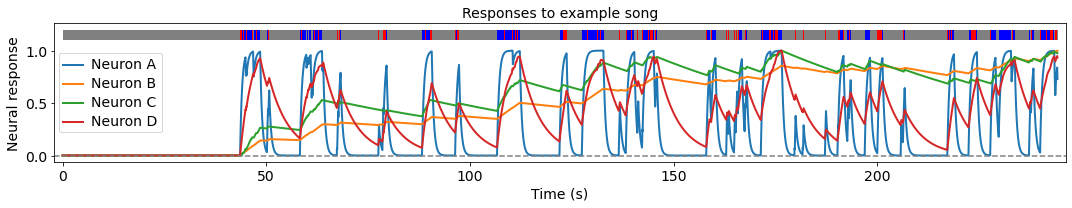

In [7]:
ITR = 39

df_tr = dfs_tr[ITR]

# record data
t = np.array(df_tr['T'])
i_s = np.array(df_tr['S']).astype(float)
i_p = np.array(df_tr['P'] | df_tr['F']).astype(float)

# simulate population response
rs = smlt_ma(i_s, i_p, params, DT)

fig, ax = plt.subplots(1, 1, figsize=(15, 3), tight_layout=True)
for r in rs.T:
    ax.plot(t, r/r.max(), lw=2)
b = np.zeros(len(t))
b[i_s == 1] = 1
b[i_p == 1] = 2
plot_b(ax, t, b, extent=[t[0], t[-1]+DT, 1.1, 1.2], c=['gray', 'b', 'r'])
ax.axhline(0, color='gray', ls='--')
ax.legend(['Neuron A', 'Neuron B', 'Neuron C', 'Neuron D'], loc='center left', ncol=1)
set_plot(ax, x_lim=(-2, t[-1]+2), y_ticks=[0, .5, 1], x_label='Time (s)', y_label='Neural response', title=f'Responses to example song', font_size=14)
fig.savefig('ms/fig_3j.svg')

........................................

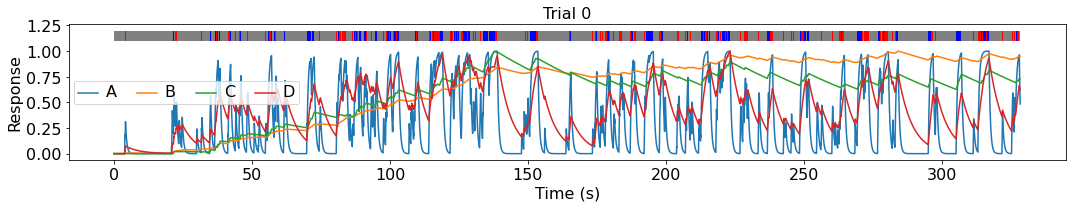

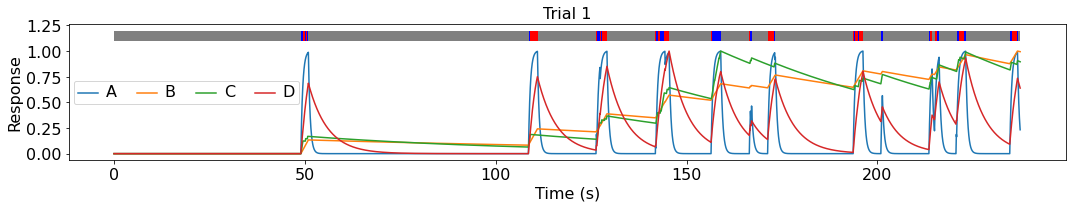

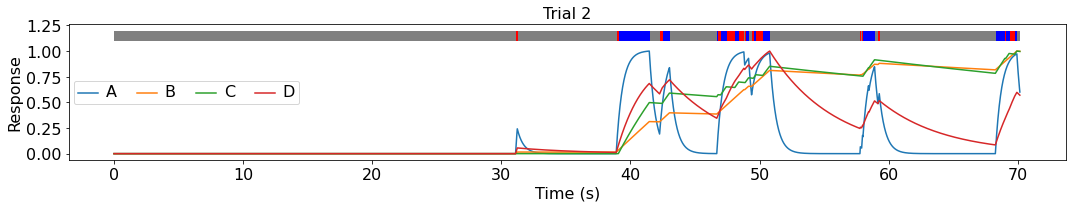

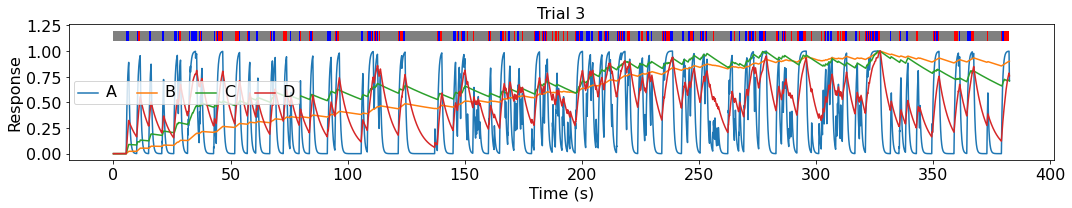

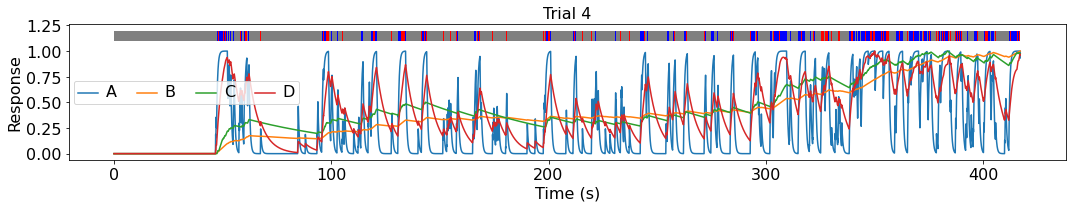

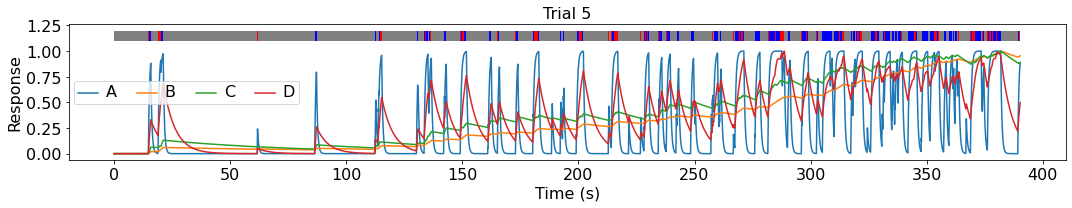

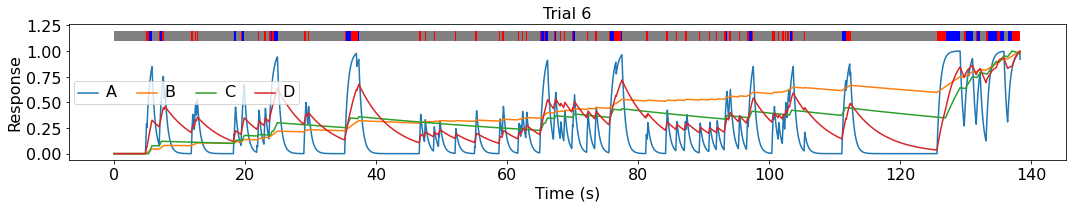

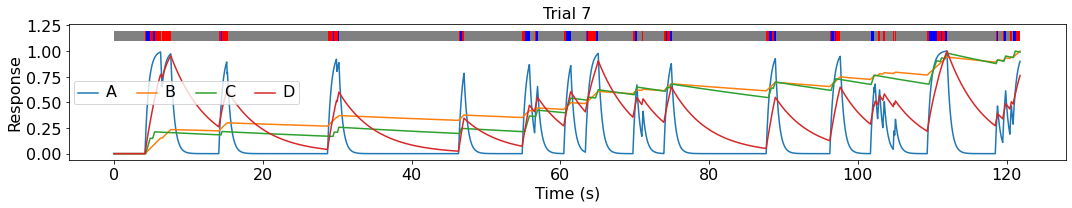

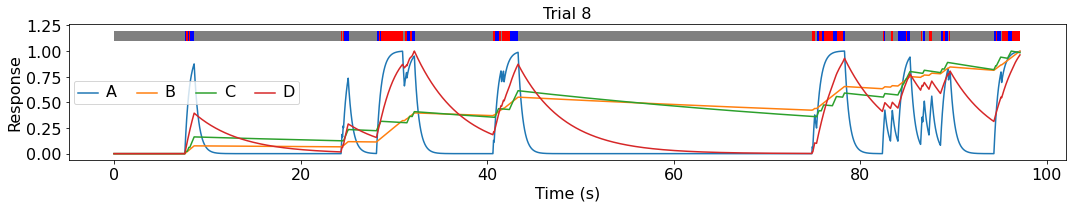

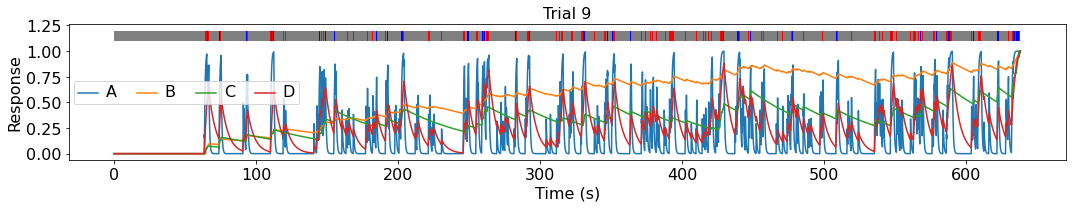

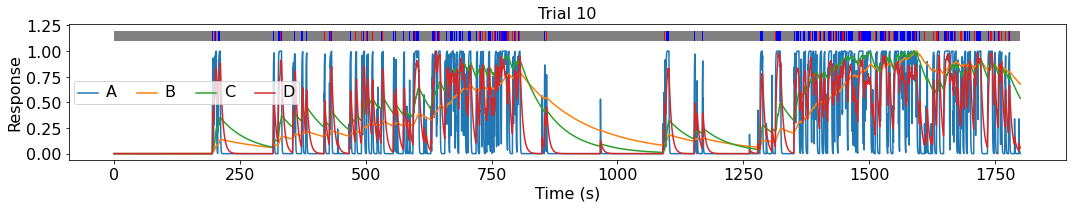

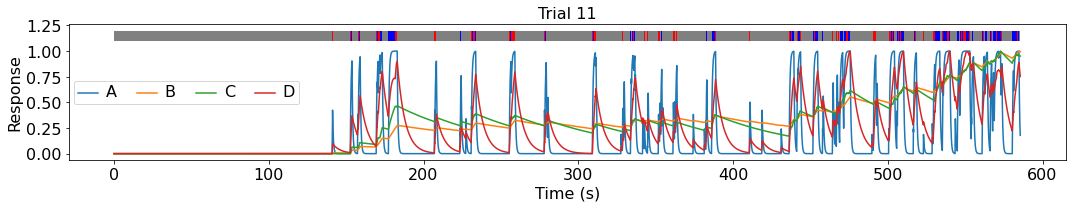

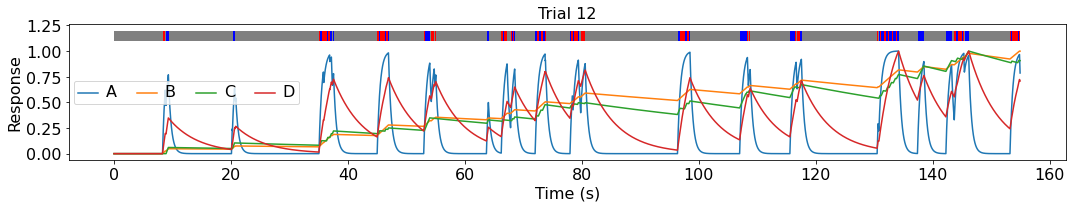

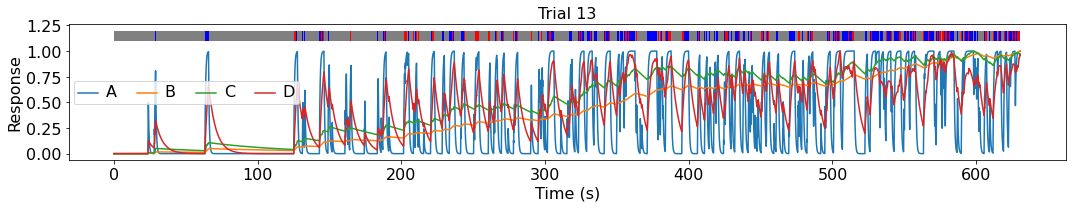

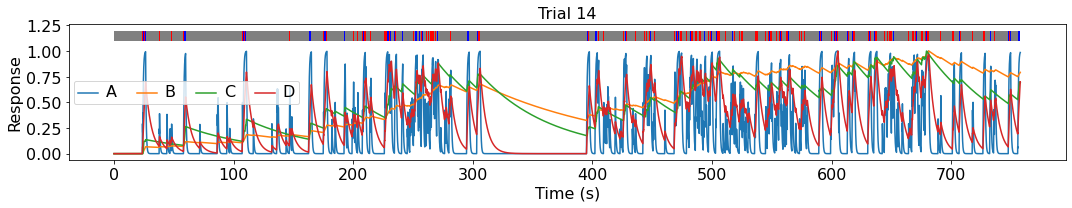

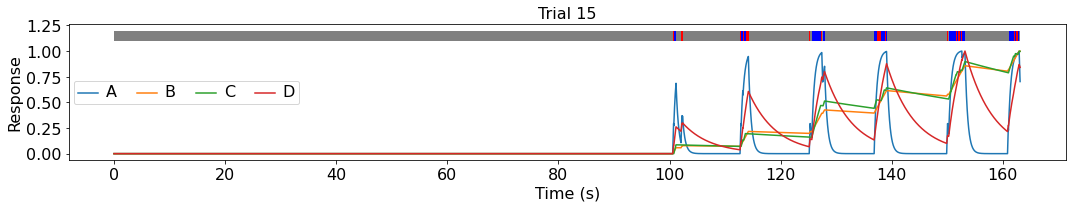

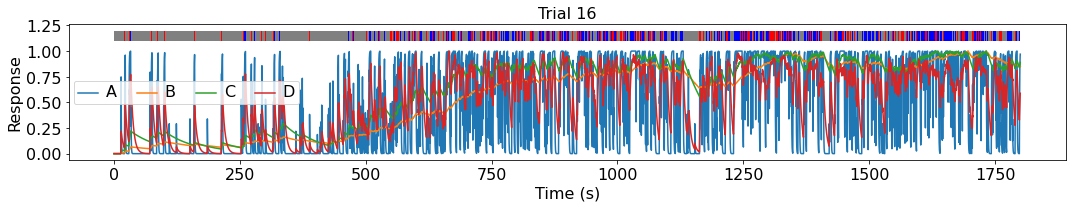

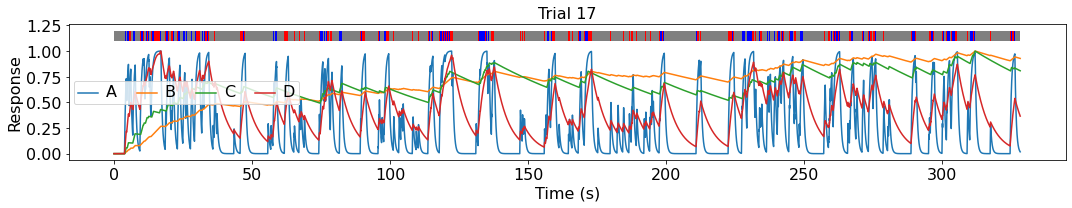

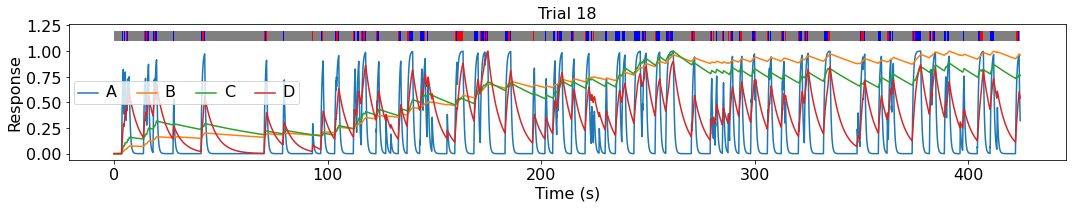

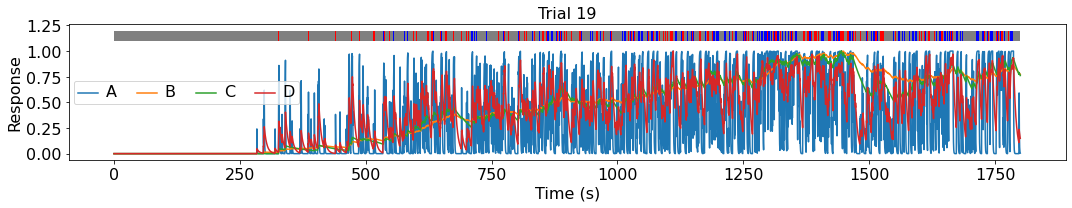

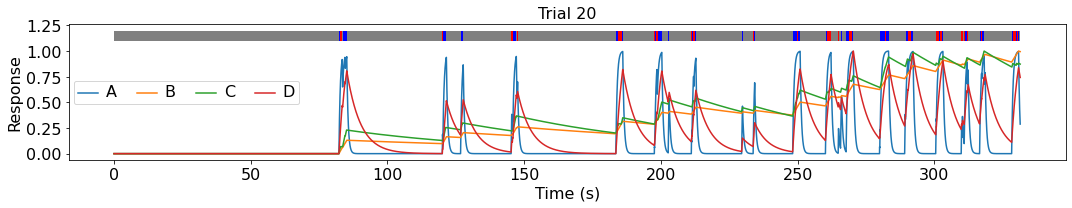

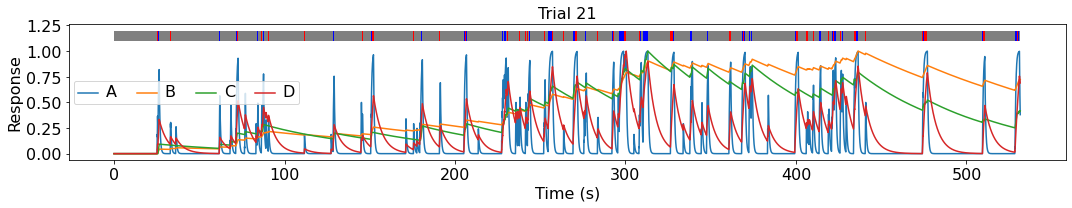

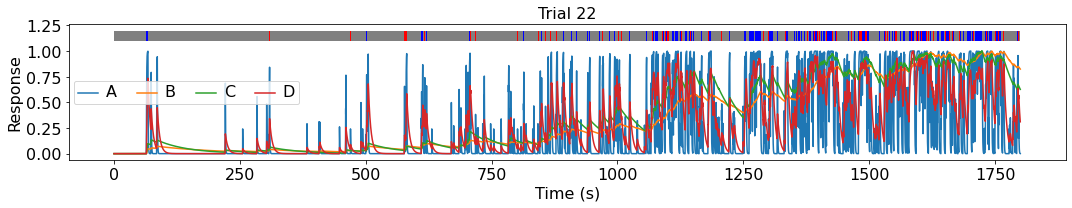

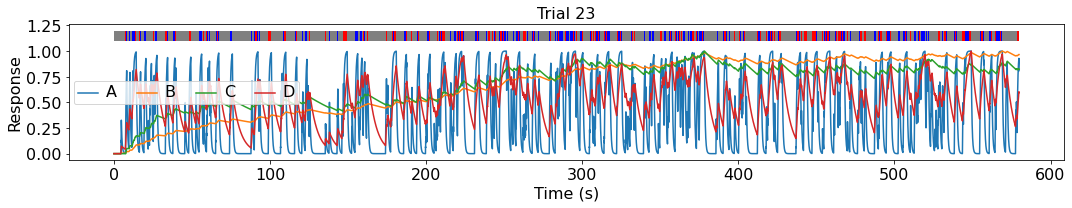

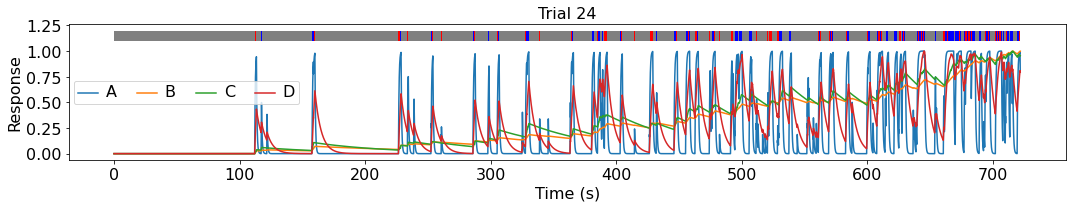

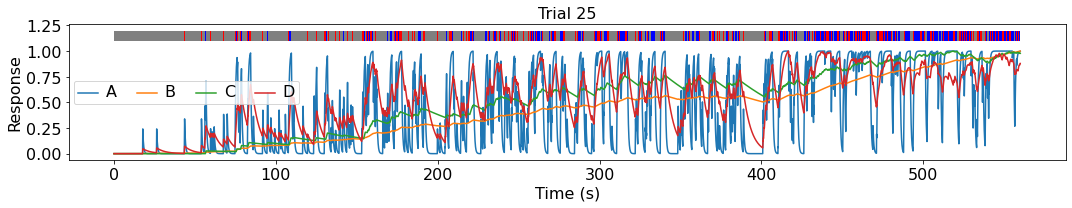

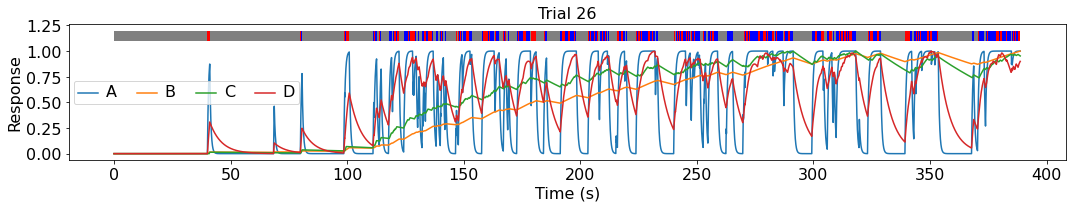

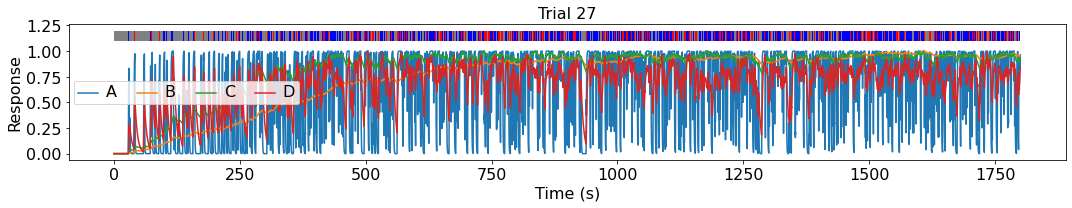

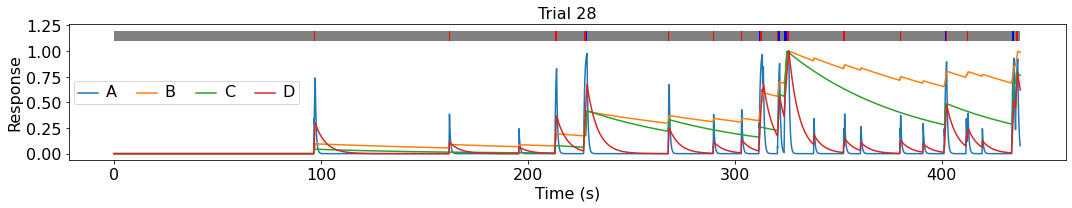

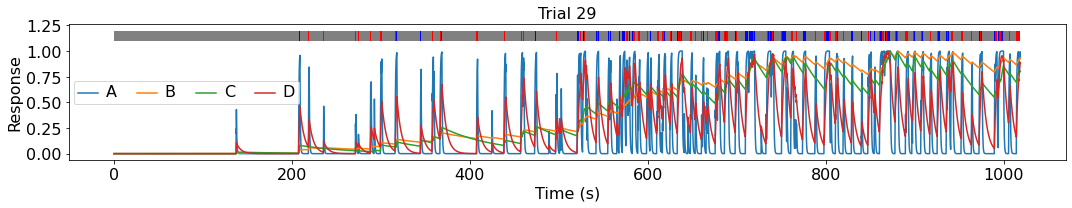

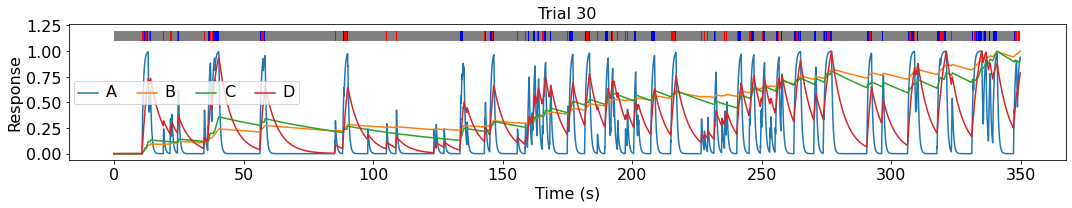

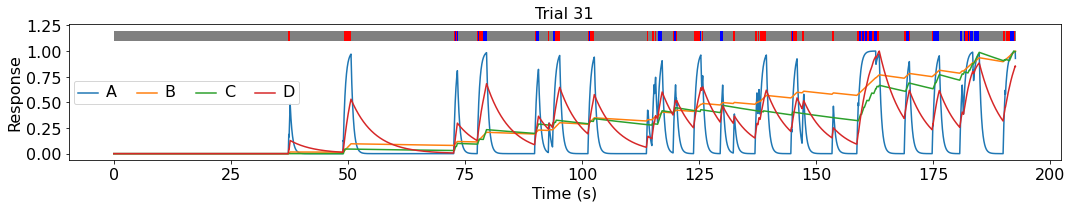

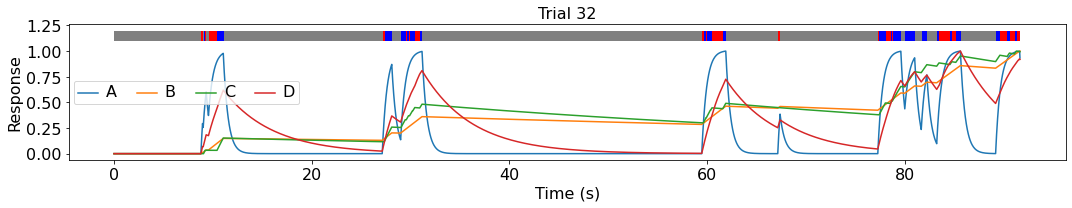

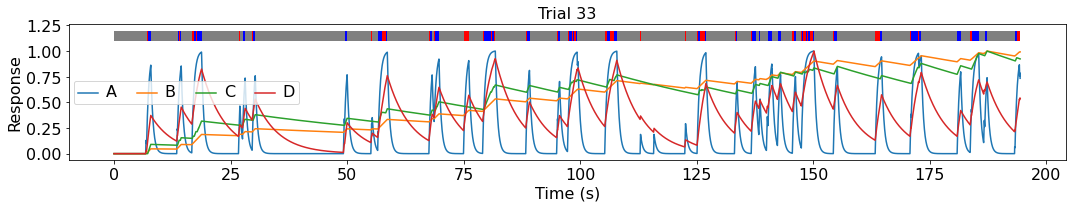

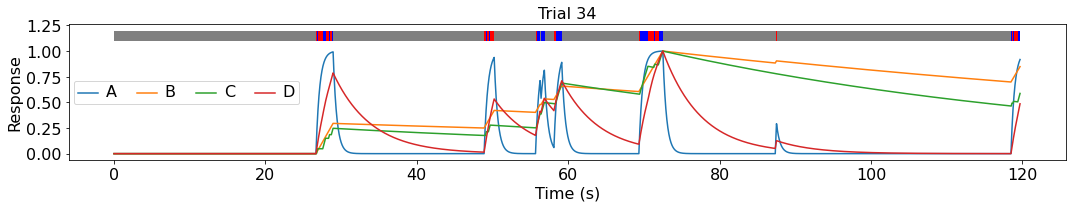

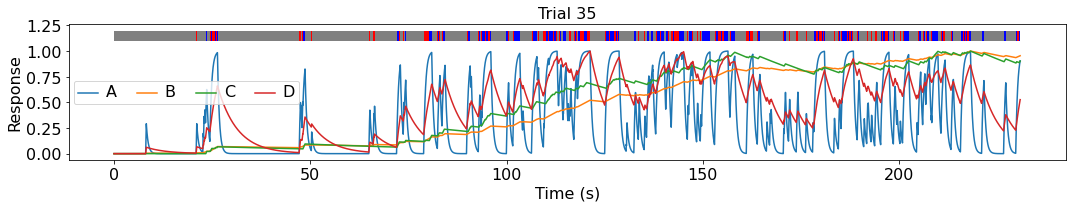

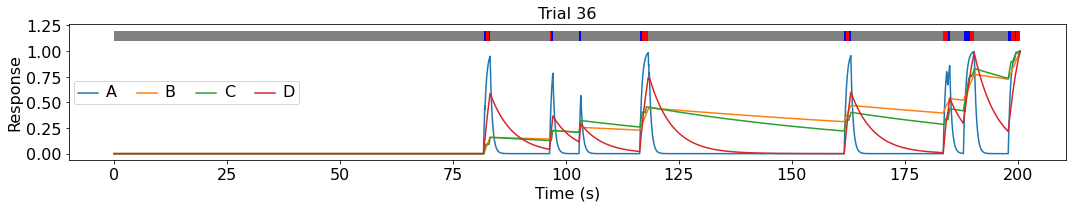

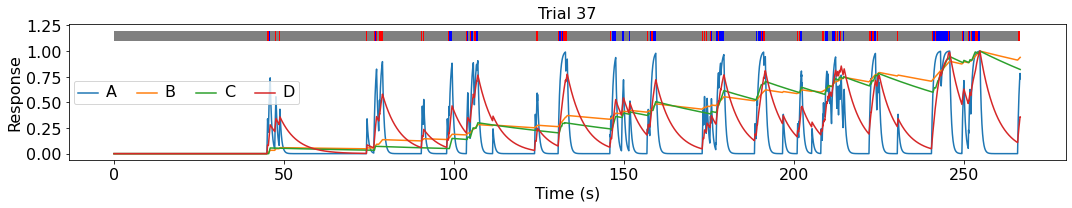

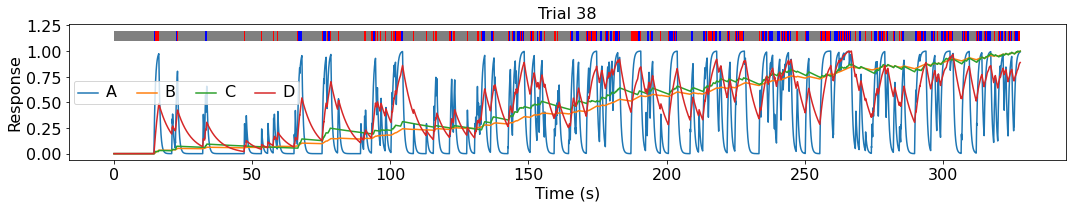

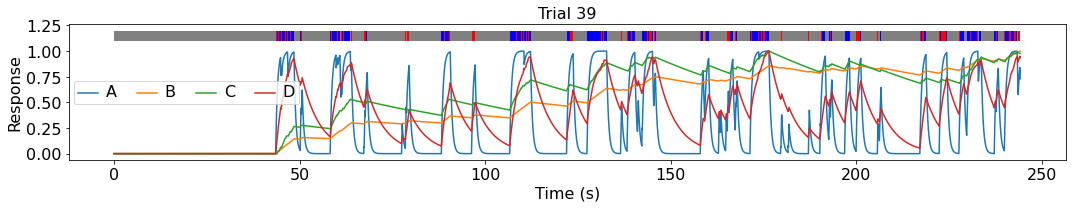

In [6]:
for ITR in range(40):
    sys.stdout.write('.')
    
    df_tr = dfs_tr[ITR]

    # record data
    t = np.array(df_tr['T'])
    i_s = np.array(df_tr['S']).astype(float)
    i_p = np.array(df_tr['P'] | df_tr['F']).astype(float)

    # simulate population response
    rs = smlt_ma(i_s, i_p, params, DT)

    fig, ax = plt.subplots(1, 1, figsize=(15, 3), tight_layout=True)
    for r in rs.T:
        ax.plot(t, r/r.max())
    b = np.zeros(len(t))
    b[i_s == 1] = 1
    b[i_p == 1] = 2
    plot_b(ax, t, b, extent=[t[0], t[-1]+DT, 1.1, 1.2], c=['gray', 'b', 'r'])
    ax.legend(['A', 'B', 'C', 'D'], loc='center left', ncol=4)
    set_plot(ax, x_label='Time (s)', y_label='Response', title=f'Trial {ITR}', font_size=16)